[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished

[2023-09-04 07:23:50] Features: 1/10 -- score: 0.8148068283917341[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s finished

[2023-09-04 07:23:51] Features: 2/10 -- score: 0.8148068283917341[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.6s finished

[2023-09-04 07:23:51] Features: 3/10 -- score: 0.8166936208445643[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

('ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Credit_History',
 'Gender_Male',
 'Dependents_1',
 'Dependents_3+',
 'Self_Employed_Yes',
 'Property_Area_Semiurban',
 'Property_Area_Urban')

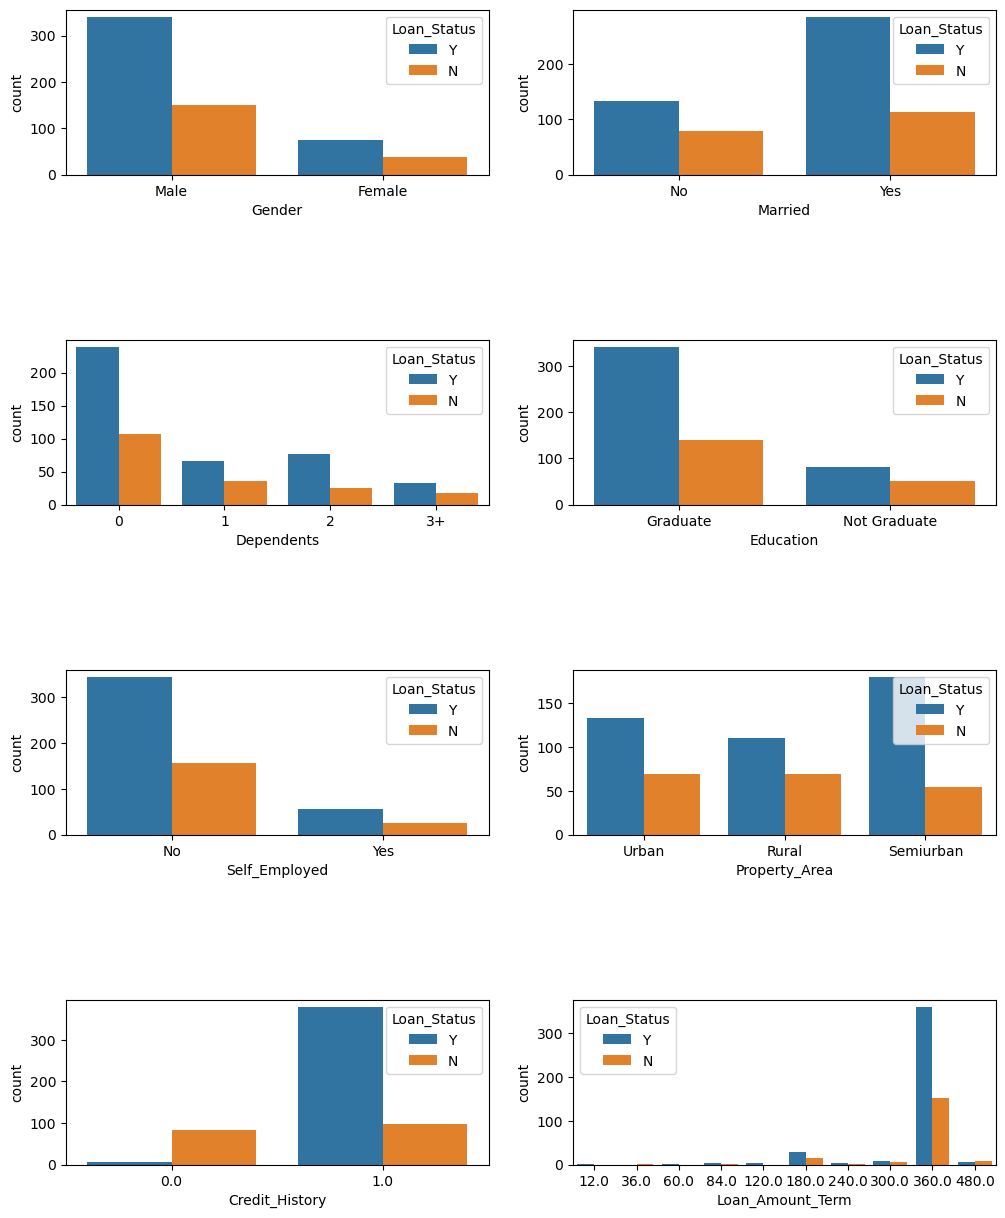

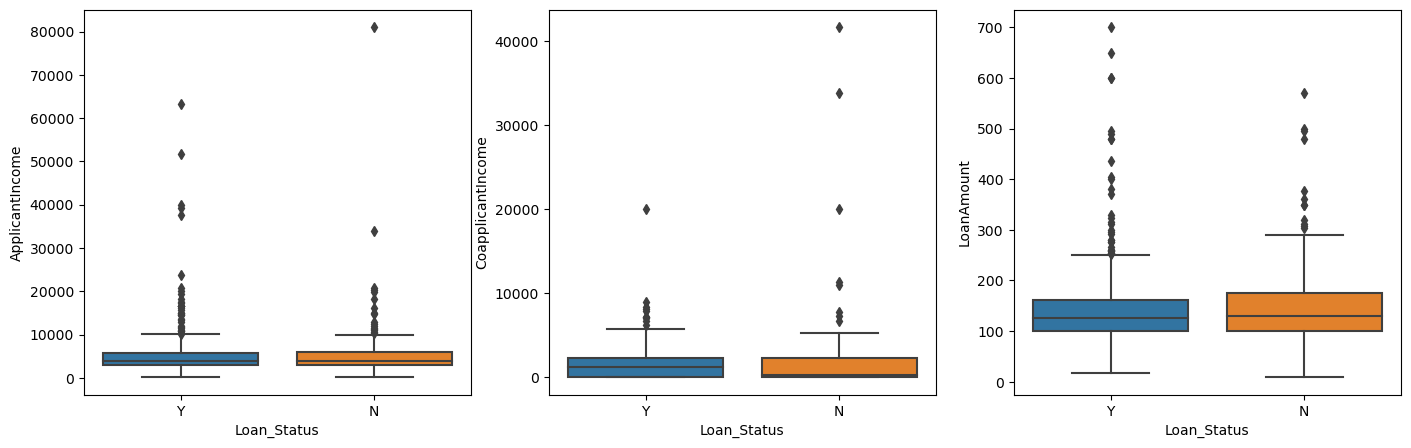

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 
from sklearn.linear_model import LogisticRegression 

loan = pd.read_excel('loanApproval.xlsx')

loan = loan.drop(columns=['Loan_ID'])

categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

numerical_features =  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_features):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=loan,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_features):
    sns.boxplot(y=cat_col,data=loan,x='Loan_Status',ax=axes[idx])

loan_encoded = pd.get_dummies(loan, drop_first=True)
loan_encoded = loan_encoded.dropna()

loan_encoded.to_csv("Modified.csv")

X = loan_encoded.drop(columns= 'Loan_Status_Y')
y = loan_encoded['Loan_Status_Y']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify =y,random_state =42)

scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

sfs = SFS(LogisticRegression(solver='lbfgs', max_iter=400),
          k_features=10, 
          forward=True,  
          verbose=2,
          scoring = 'accuracy', 
          cv = 5)

sfs.fit(X, y) 
sfs.k_feature_names_

# sfs = SFS(LogisticRegression(solver='lbfgs', max_iter=400),
#           k_features='best', 
#           forward=True,  
#           verbose=2,
#           scoring = 'accuracy', 
#           cv = 5)

# sfs.fit(X, y) 
# sfs.k_feature_names_







   
























